# Cleaning and Preliminary EDA

In [1]:
import numpy as np

In [2]:
import pandas as pd
import os


def formatting(person):
    """ Function that takes a folder path and output event and emotions

    Parameters
    ----------
    folder_path :  str
        path to the person folder


    Return
    ----------
    df_emotion : pandas dataframe
        dataframe of emotion
    df_event : pandas dataframe
        dataframe of event with right timestamp
"""
    folder_path = 'DataSet/'+person
    emotions = os.path.join(folder_path, folder_path.split('/')[-1] + '_face.csv')
    event = os.path.join(folder_path, folder_path.split('/')[-1] + '-df_event_with_time.csv')
    df_emotion = pd.read_csv(emotions, sep=',')
    df_event = pd.read_csv(event, sep=';')

    df_event['timestamp_event'] = df_event['timestamp'] - df_event['tealeafTime'] + df_event['time_sent'] - df_event[
        'datakalabTime']
    df_event = df_event.loc[df_event.datakalab_id == folder_path.split('/')[-1]].sort_values('timestamp_event')
    df_event_mouse = df_event.loc[df_event.event_name == 'MOUSE']
    df_event_mouse['x'] = df_event_mouse['event'].apply(lambda x : x.split(',')[0])
    df_event_mouse['y'] = df_event_mouse['event'].apply(lambda x : x.split(',')[1])
    df_event_mouse = df_event_mouse[['SESSION_ID','timestamp_event','x','y', 'pages']]
    df_event_mouse['person'] = person.strip()
    df_emotion['person'] = person.strip()
    columns = [col for col in df_emotion.columns if 'present' in col or 'convolve' in col]
    columns.extend(["pitch","roll","yaw","timestamp", "person"])
    df_emotion = df_emotion[columns]
    
    
    return df_emotion, df_event_mouse

dirs = os.listdir("DataSet")
dirs = [i for i in dirs if i != '.DS_Store']

dfs = [formatting(person) for person in dirs] 
emotion, mouse = zip(*dfs)

emotion = pd.concat(emotion)
mouse = pd.concat(mouse)


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Primliminary EDA 

In [25]:
emotion.describe()

,present-anger,present-contempt,present-disgust,present-fear,present-happiness,present-neutral,present-sadness,present-surprise,present-AU1,present-AU2,...,present-surprise_AU,present-happiness_AU,colere_au4_convolve,adhesion_convolve,surprise_au_convolve,emergence_convolve,pitch,roll,yaw,timestamp
count,689967.000000,689967.0,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,...,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000,689967.000000
mean,0.000101,0.0,0.000048,0.000072,0.000101,0.000242,0.000110,0.000171,0.000048,-0.000026,...,0.000006,0.000074,0.012848,0.010580,0.039463,0.061765,-2.108153,0.121568,0.945052,196406.169221
std,0.049345,0.0,0.054041,0.054162,0.047884,0.055626,0.054054,0.054800,0.062937,0.070177,...,0.061150,0.036930,0.112620,0.102315,0.194693,0.240729,10.196620,10.914275,10.356853,167013.049779
min,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-166.202744,-170.709885,-89.499931,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.849720,-1.743887,-3.692101,54531.358372
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.852058,0.000000,0.000000,144103.795778
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.118510,2.414377,4.554568,314073.864352
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,173.910049,177.690201,89.439774,602060.570121


In [26]:
mouse

,SESSION_ID,timestamp_event,x,y,pages,person,duration,change of page,/,/10122010029-basket-taupe-mix-matieres.html,...,/ventes-privees-h-18/homme/,/ventes-privees-h-18/sacs-accessoires/,/ventes-privees/,/wishlist/,/wishlist/index/index/,change_in_x,change_in_y,distance,x_velocity,y_velocity
785,00003234844012932976778236855416_20181228183826,25678.0,560.0,948.0,/,5c265f52fad06f2dc6bbff8d,2130.000000,1,1,0,...,0,0,0,0,0,7.000000,-169.000000,169.144908,0.003286,-0.079343
789,00003234844012932976778236855416_20181228183826,27808.0,553.0,1117.0,/,5c265f52fad06f2dc6bbff8d,522.000000,0,1,0,...,0,0,0,0,0,0.000000,-116.000000,116.000000,0.000000,-0.222222
787,00003234844012932976778236855416_20181228183826,28330.0,553.0,1233.0,/,5c265f52fad06f2dc6bbff8d,449.000000,0,1,0,...,0,0,0,0,0,-75.000000,-117.000000,138.974818,-0.167038,-0.260579
786,00003234844012932976778236855416_20181228183826,28779.0,628.0,1350.0,/,5c265f52fad06f2dc6bbff8d,457.000000,0,1,0,...,0,0,0,0,0,-115.000000,-23.000000,117.277449,-0.251641,-0.050328
788,00003234844012932976778236855416_20181228183826,29236.0,743.0,1373.0,/,5c265f52fad06f2dc6bbff8d,17765.000000,1,1,0,...,0,0,0,0,0,-202.000000,183.000000,272.567423,-0.011371,0.010301
802,00003234844012932976778236855416_20181228183826,47001.0,945.0,1190.0,/ventes-privees/,5c265f52fad06f2dc6bbff8d,423.000000,0,0,0,...,0,0,1,0,0,-3.000000,-195.000000,195.023076,-0.007092,-0.460993
796,00003234844012932976778236855416_20181228183826,47424.0,948.0,1385.0,/ventes-privees/,5c265f52fad06f2dc6bbff8d,945.000000,0,0,0,...,0,0,1,0,0,-13.000000,-308.000000,308.274229,-0.013757,-0.325926
797,00003234844012932976778236855416_20181228183826,48369.0,961.0,1693.0,/ventes-privees/,5c265f52fad06f2dc6bbff8d,156.000000,0,0,0,...,0,0,1,0,0,-3.000000,-4.000000,5.000000,-0.019231,-0.025641
801,00003234844012932976778236855416_20181228183826,48525.0,964.0,1697.0,/ventes-privees/,5c265f52fad06f2dc6bbff8d,170.000000,0,0,0,...,0,0,1,0,0,-7.000000,31.000000,31.780497,-0.041176,0.182353
791,00003234844012932976778236855416_20181228183826,48695.0,971.0,1666.0,/ventes-privees/,5c265f52fad06f2dc6bbff8d,216.000000,0,0,0,...,0,0,1,0,0,-2.000000,45.000000,45.044423,-0.009259,0.208333


In [27]:
# adding feature of duration to our mouse dataframe (added mean as last duration bc it would have been empty)
duration = []
times = mouse['timestamp_event'].values
for i in range(len(times) - 1):
    duration.append(times[i+1] - times[i])
duration.append(np.mean(duration))
mouse['duration'] = duration

In [28]:
change_page = []
x = [i for i in mouse['pages'].values]
x
change_page.append(1)
for i in range(len(mouse['pages']) - 2):
    prev = x[i+1]
    curr = x[i+2]
    if prev == curr:
        change_page.append(0)
    else:
        change_page.append(1)
change_page.append(1)

mouse['change of page'] = change_page

In [29]:
pages_df = pd.get_dummies(mouse['pages'])
dummy_pages = [i for i in pages_df.columns.values]

for i in dummy_pages:
    mouse[i] = pages_df[i]

In [30]:
# changing mouse features to be floats not strings
x = [float(i) for i in mouse['x'].values]
y = [float(i) for i in mouse['y'].values]
timestamp = [float(i) for i in mouse['timestamp_event'].values]
mouse['x'] = x
mouse['y'] = y
mouse['timestamp_event'] = timestamp

In [31]:
mouse.dtypes

SESSION_ID                                                      object
timestamp_event                                                float64
x                                                              float64
y                                                              float64
pages                                                           object
person                                                          object
duration                                                       float64
change of page                                                   int64
/                                                                uint8
/10122010029-basket-taupe-mix-matieres.html                      uint8
/10123820029-boots-brode-verni-gris.html                         uint8
/10123820043-boots-noir-a-elastique-a-pois.html                  uint8
/10124330036-tennis-vert-deau-paillete-a-lacet-ruban.html        uint8
/10141880024-basket-grise-croute-de-cuir-a-etoiles.html          uint8
/10141

In [32]:
# adding change in x, change in y, and distance as features 
change_in_x = []
for i in range(len(mouse['x']) - 1):
    change_in_x.append(x[i] - x[i+1])
change_in_x.append(np.mean(change_in_x))
mouse['change_in_x'] = change_in_x

change_in_y = []
for i in range(len(mouse['y']) - 1):
    change_in_y.append(y[i] - y[i+1])
change_in_y.append(np.mean(change_in_y))
mouse['change_in_y'] = change_in_y

mouse['distance'] = np.sqrt(mouse['change_in_x']**2 + mouse['change_in_y']**2)

mouse['x_velocity'] = mouse['change_in_x'] / mouse['duration']

mouse['y_velocity'] = mouse['change_in_y'] / mouse['duration']

In [33]:
# adding emotion features to our mouse dataframe for each mouse tracking data point for each user (max, min, and mean)
combined = pd.DataFrame()

persons = mouse['person'].unique()

for person in persons:
    mouse_person = mouse.loc[mouse['person'] == person]
    emotion_person = emotion.loc[emotion['person'] == person]
    emotion_person = emotion_person.loc[emotion_person['timestamp'] >= mouse_person['timestamp_event'].iloc[0]]
    emotion_person = emotion_person.loc[emotion_person['timestamp'] <= mouse_person['timestamp_event'].iloc[-1]]

    i = 0
    master_index = []
    for entry in range(len(emotion_person)):
        while (emotion_person.iloc[entry]['timestamp'] < mouse_person['timestamp_event'].iloc[i] or emotion_person.iloc[entry]['timestamp'] >= mouse_person['timestamp_event'].iloc[i+1]):
            i += 1
        master_index.append(mouse_person['timestamp_event'].iloc[i])

    emotion_person['master'] = master_index
    
    good_max = emotion_person.groupby(['person', 'master']).max()
    good_max = good_max.reset_index()
    good_max = good_max.rename(index=str, columns={"master": "timestamp_event"} )
    good_max_cols = [i for i in good_max.columns]
    for j in range(len(good_max_cols)):
        if j > 1:
            good_max_cols[j] = "MAX-" + good_max_cols[j]
    good_max.columns = good_max_cols

    good_min = emotion_person.groupby(['person', 'master']).min()
    good_min = good_min.reset_index()
    good_min = good_min.rename(index=str, columns={"master": "timestamp_event"} )
    good_min_cols = [i for i in good_min.columns]
    for j in range(len(good_min_cols)):
        if j > 1:
            good_min_cols[j] = "MIN-" + good_min_cols[j]
    good_min.columns = good_min_cols
    good_max = good_max.merge(good_min)
    
    good_mean = emotion_person.groupby(['person', 'master']).mean()
    good_mean = good_mean.reset_index()
    good_mean = good_mean.rename(index=str, columns={"master": "timestamp_event"} )
    good_mean_cols = [i for i in good_mean.columns]
    for j in range(len(good_mean_cols)):
        if j > 1:
            good_mean_cols[j] = "MEAN-" + good_mean_cols[j]
    good_mean.columns = good_mean_cols
    good_max = good_max.merge(good_mean)
    good_max['count'] = emotion_person.groupby(['person','master']).count()['timestamp'].values


    good_mouse = mouse.merge(good_max)
    combined = combined.append(good_mouse)
    
    

In [34]:
# un comment this!! i just did bc i accidently ran it more than once
combined = combined.drop(columns = ["MAX-timestamp", "MIN-timestamp", "MEAN-timestamp", "MAX-present-contempt", "MIN-present-contempt", "MEAN-present-contempt", "MAX-present-AU1", "MAX-present-AU2", "MAX-present-AU4", "MAX-present-AU6", "MAX-present-AU9", "MAX-present-AU12", "MIN-present-AU1", "MIN-present-AU2", "MIN-present-AU4", "MIN-present-AU6", "MIN-present-AU9", "MIN-present-AU12", "MEAN-present-AU1", "MEAN-present-AU2", "MEAN-present-AU4", "MEAN-present-AU6", "MEAN-present-AU9", "MEAN-present-AU12"])



In [35]:
combined = combined[combined['timestamp_event'] >= 0]
combined_emotions = combined[['MAX-present-anger',
 'MAX-present-disgust',
 'MAX-present-fear',
 'MAX-present-happiness',
 'MAX-present-neutral',
 'MAX-present-sadness',
 'MAX-present-surprise']]

major_emotion = [i[4:] for i in combined_emotions.idxmax(axis=1).values]
combined['major emotion'] = major_emotion

In [36]:
combined.to_csv(path_or_buf="cleaned_data")

# EDA 

In [15]:
import matplotlib.pyplot as plt

In [16]:
combined.dtypes

SESSION_ID                                                      object
timestamp_event                                                float64
x                                                              float64
y                                                              float64
pages                                                           object
person                                                          object
duration                                                       float64
change of page                                                   int64
/                                                                uint8
/10122010029-basket-taupe-mix-matieres.html                      uint8
/10123820029-boots-brode-verni-gris.html                         uint8
/10123820043-boots-noir-a-elastique-a-pois.html                  uint8
/10124330036-tennis-vert-deau-paillete-a-lacet-ruban.html        uint8
/10141880024-basket-grise-croute-de-cuir-a-etoiles.html          uint8
/10141

In [17]:
combined.describe()

,timestamp_event,x,y,duration,change of page,/,/10122010029-basket-taupe-mix-matieres.html,/10123820029-boots-brode-verni-gris.html,/10123820043-boots-noir-a-elastique-a-pois.html,/10124330036-tennis-vert-deau-paillete-a-lacet-ruban.html,...,MEAN-present-surprise_AU,MEAN-present-happiness_AU,MEAN-colere_au4_convolve,MEAN-adhesion_convolve,MEAN-surprise_au_convolve,MEAN-emergence_convolve,MEAN-pitch,MEAN-roll,MEAN-yaw,count
count,63077.000000,63077.000000,63077.000000,6.307700e+04,63077.000000,63077.000000,63077.0,63077.0,63077.0,63077.000000,...,63077.000000,63077.000000,63077.000000,63077.000000,63077.000000,63077.000000,63077.000000,63077.000000,63077.000000,63077.000000
mean,140593.572713,824.934953,1283.849311,1.326741e+03,0.032056,0.124721,0.0,0.0,0.0,0.001046,...,0.000142,0.000136,0.008665,0.009996,0.027739,0.045092,-2.321032,0.058629,0.549726,7.783899
std,118510.520172,424.524896,2447.374061,7.631015e+03,0.176150,0.330404,0.0,0.0,0.0,0.032331,...,0.050687,0.035724,0.088630,0.094713,0.156711,0.197942,9.874743,10.659322,9.654049,35.292034
min,15.000000,0.000000,0.000000,6.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-105.258949,-117.058285,-87.354027,1.000000
25%,49297.000000,507.000000,350.000000,1.910000e+02,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.563301,-1.942135,-3.886724,1.000000
50%,107035.000000,786.000000,681.000000,2.330000e+02,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.456169,0.000000,0.000000,2.000000
75%,200360.000000,1137.000000,1475.000000,5.820000e+02,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.994725,2.508386,4.463547,4.000000
max,599717.000000,1919.000000,41949.000000,1.322420e+06,1.000000,1.000000,0.0,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.941114,107.488579,69.517326,3594.000000


#### Mouse Tracking Data Plots and Analysis

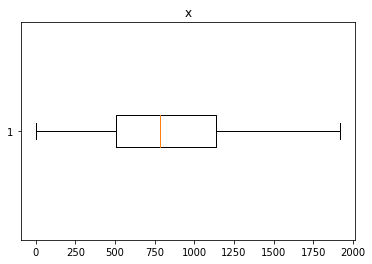

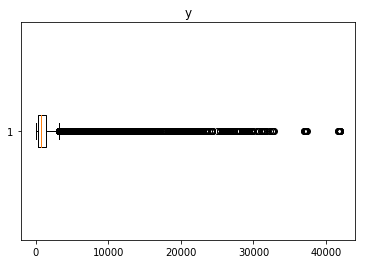

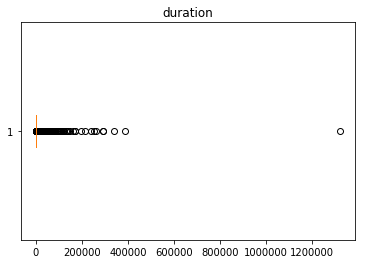

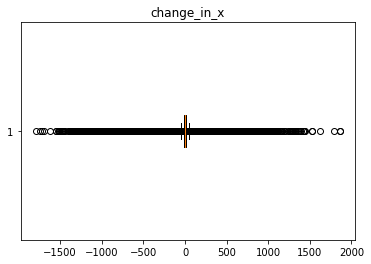

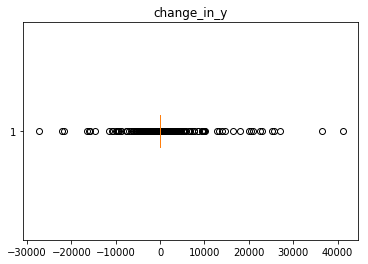

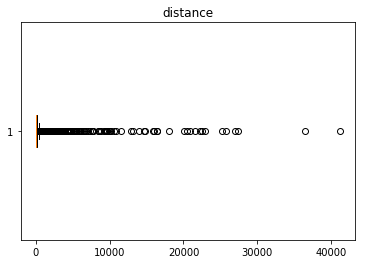

In [18]:
mouse_cols = ["x", "y", "duration", "change_in_x", "change_in_y", "distance"]
for i in mouse_cols:
    plt.boxplot(combined[i], vert=False)
    plt.title(i)
    plt.show()

Text(0, 0.5, 'x-coord')

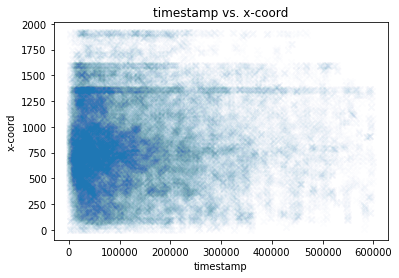

In [19]:
plt.scatter(x = combined['timestamp_event'], y = combined['x'], marker='x', alpha=.01)
plt.title("timestamp vs. x-coord")
plt.xlabel("timestamp")
plt.ylabel("x-coord")

Text(0.5, 1.0, "Spread of Timestamp's")

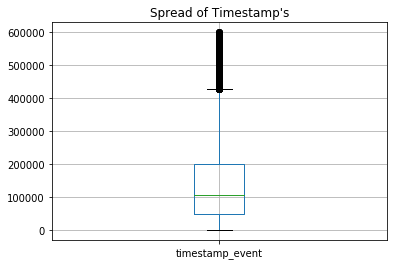

In [20]:
combined.boxplot('timestamp_event')
plt.title("Spread of Timestamp's")

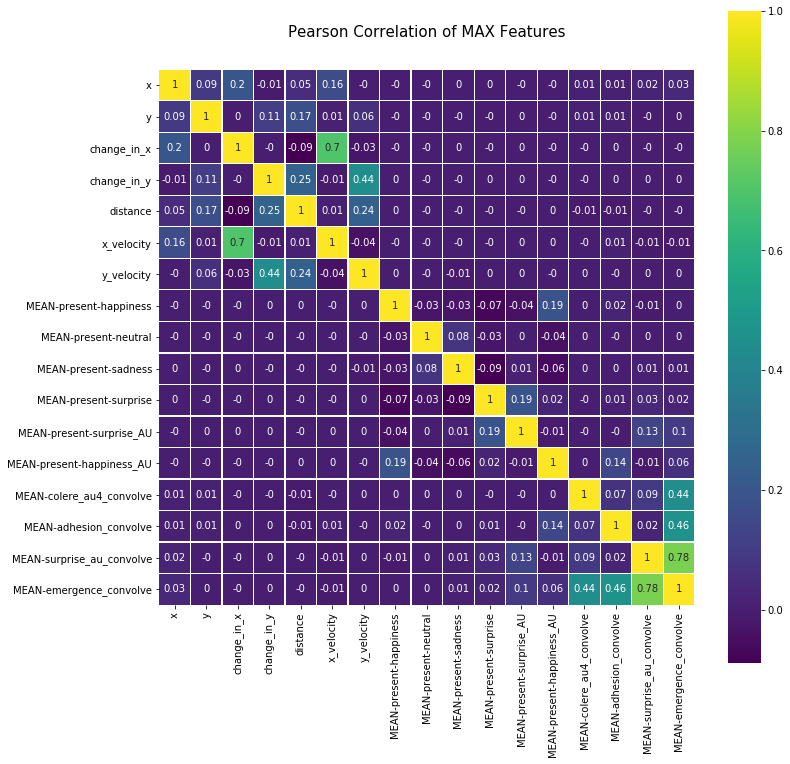

In [21]:
# Uncorrelated features are generally more powerful predictors
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of MAX Features', y=1.05, size=15)
sns.heatmap(combined[['x', 'y','change_in_x',
 'change_in_y',
 'distance',
 'x_velocity',
 'y_velocity',
 'MEAN-present-happiness',
 'MEAN-present-neutral',
 'MEAN-present-sadness',
 'MEAN-present-surprise',
 'MEAN-present-surprise_AU',
 'MEAN-present-happiness_AU',
 'MEAN-colere_au4_convolve',
 'MEAN-adhesion_convolve',
 'MEAN-surprise_au_convolve',
 'MEAN-emergence_convolve']].corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

Text(0.5, 1.0, 'Click Coordinates')

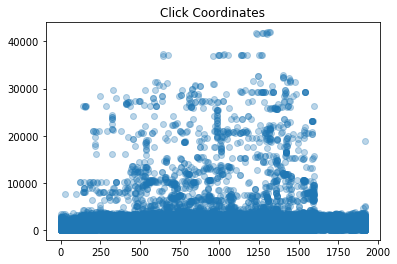

In [22]:
plt.scatter(combined['x'], combined['y'], alpha = .3)
plt.title("Click Coordinates")

In [23]:
mean_emotions = ['MEAN-present-anger',
 'MEAN-present-disgust',
 'MEAN-present-fear',
 'MEAN-present-happiness',
 'MEAN-present-neutral',
 'MEAN-present-sadness',
 'MEAN-present-surprise']

min_emotions = ['MIN-present-anger',
 'MIN-present-disgust',
 'MIN-present-fear',
 'MIN-present-happiness',
 'MIN-present-neutral',
 'MIN-present-sadness',
 'MIN-present-surprise']

max_emotions = ['MAX-present-anger',
 'MAX-present-disgust',
 'MAX-present-fear',
 'MAX-present-happiness',
 'MAX-present-neutral',
 'MAX-present-sadness',
 'MAX-present-surprise']

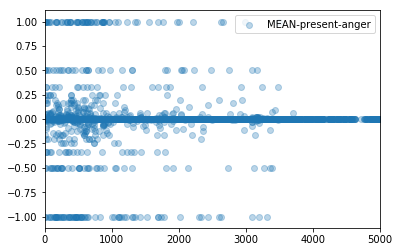

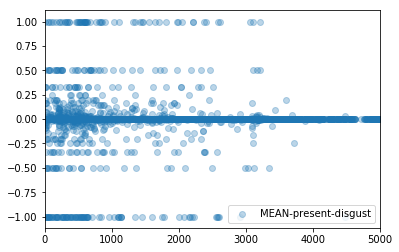

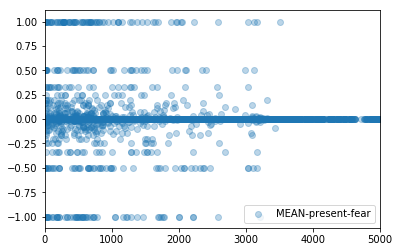

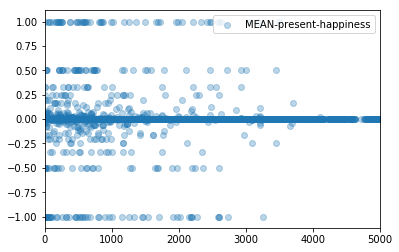

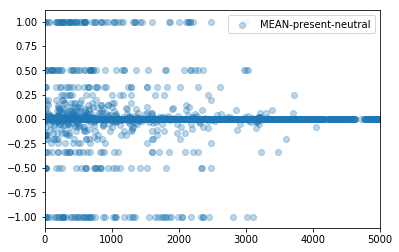

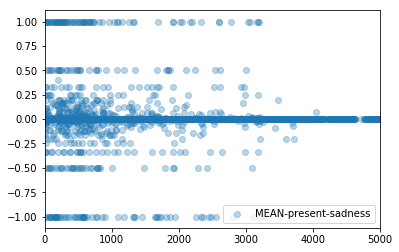

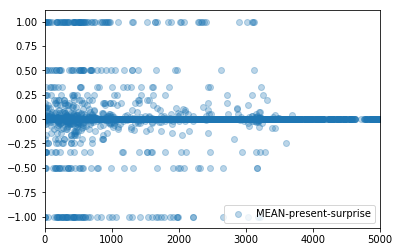

In [24]:
for e in mean_emotions:
    plt.scatter(combined['y'], combined[e], alpha =.3)
    plt.xlim(0,5000)
    plt.legend()
    plt.show()

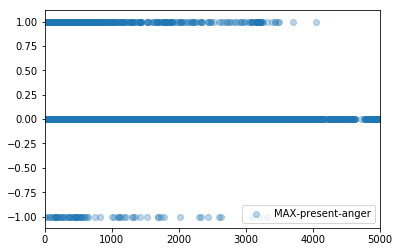

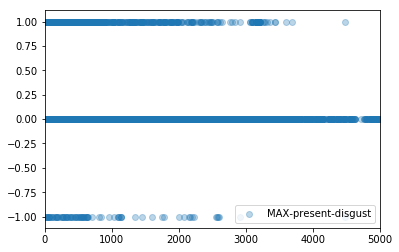

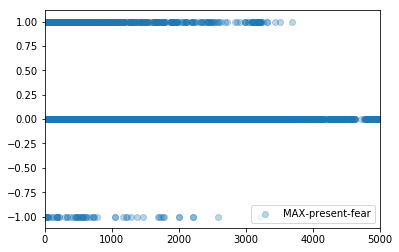

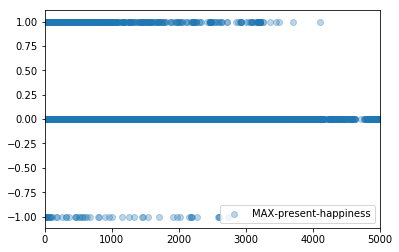

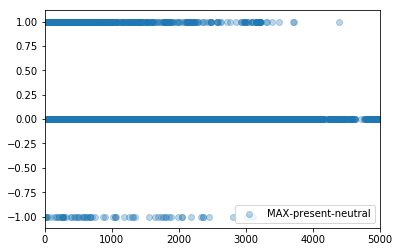

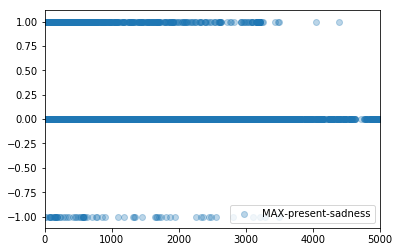

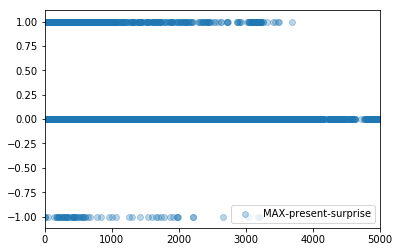

In [25]:
for e in max_emotions:
    plt.scatter(combined['y'], combined[e], alpha =.3)
    plt.xlim(0,5000)
    plt.legend()
    plt.show()

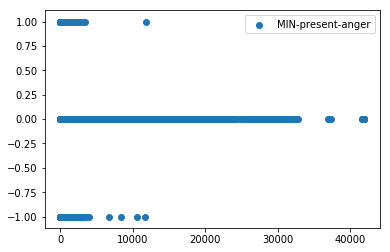

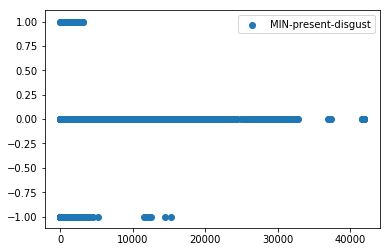

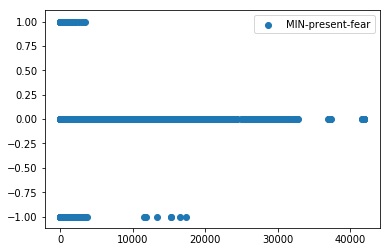

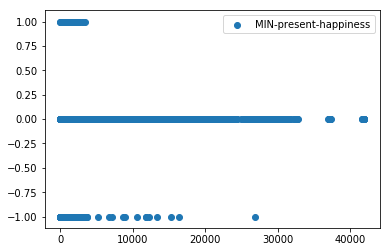

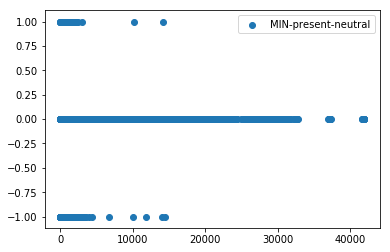

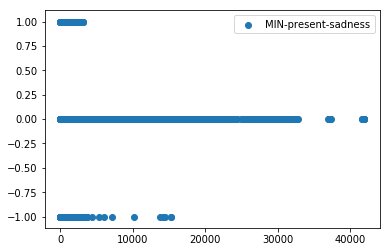

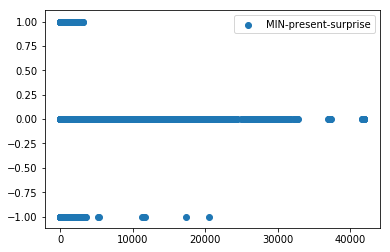

In [26]:
for e in min_emotions:
    plt.scatter(combined['y'], combined[e])
    plt.legend()
    plt.show()

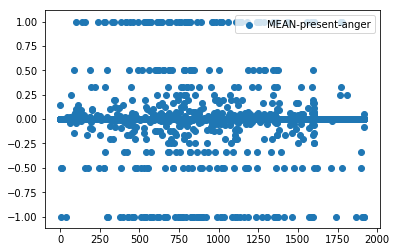

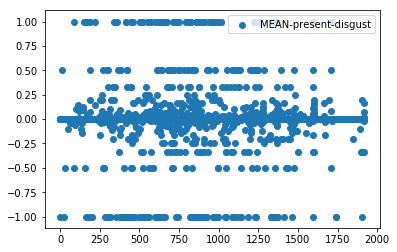

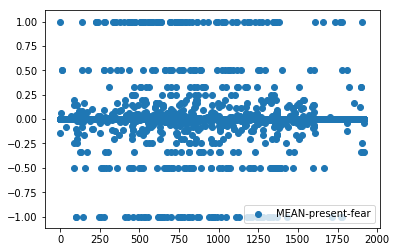

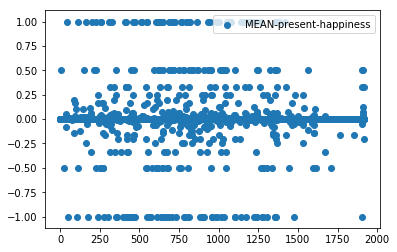

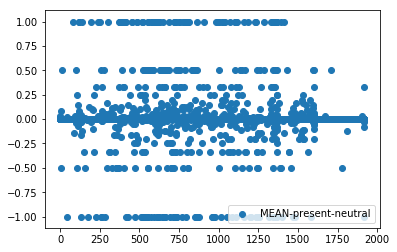

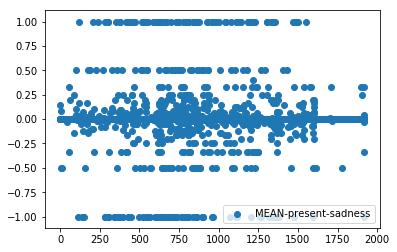

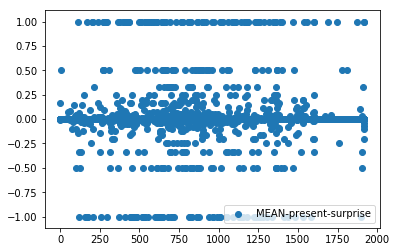

In [27]:
for e in mean_emotions:
    plt.scatter(combined['x'], combined[e])
    plt.legend()
    plt.show()